In [101]:
from numpy import load
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import matplotlib.pyplot as plt
import keras

numpy_file_dir = "drive/My Drive/NN_files/"
# load dict of arrays
X_train = load(numpy_file_dir + "X_train.npz")
y_train = load(numpy_file_dir + "y_train.npz")
X_test = load(numpy_file_dir + "X_test.npz")
y_test = load(numpy_file_dir + "y_test.npz")

# extract the first array
X_train = X_train["arr_0"]
y_train = y_train["arr_0"]
X_test = X_test["arr_0"]
y_test = y_test["arr_0"]

# check image shape
print(X_train.shape)
print(y_train.shape)

# one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# create model
model = Sequential()

# add model layers
# 64 - liczba neuronów, kernel_size - maska 3x3,
model.add(Conv2D(32, kernel_size=3, activation="relu", input_shape=(220, 220, 3), data_format="channels_last"))
model.add(Dropout(0.5))
model.add(Conv2D(32, kernel_size=5, activation="relu"))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Dropout(0.5))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(Dropout(0.2))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(Dropout(0.2))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(Dropout(0.1))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(Conv2D(8, kernel_size=3, activation="relu"))

# warstwa łącząca conv2d z warstwą dense
model.add(Flatten())
# liczba taka ile wyjść, tu 10 liczb (u mnie będzie 6 wyjść bo tyle jest typów)
model.add(Dense(6, activation="softmax"))

(12000, 220, 220, 3)
(12000,)


In [102]:
# compile model using accuracy to measure model performance
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False), loss="categorical_crossentropy", metrics=["accuracy"]) #Adadelta, Adamax

# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100, shuffle=True)

Train on 12000 samples, validate on 3000 samples
Epoch 1/10
12000/12000 [==============================] - 58s 5ms/step - loss: 1.3725 - accuracy: 0.4515 - val_loss: 1.1501 - val_accuracy: 0.6080
Epoch 2/10
12000/12000 [==============================] - 57s 5ms/step - loss: 0.3003 - accuracy: 0.9106 - val_loss: 1.6150 - val_accuracy: 0.6207
Epoch 3/10
12000/12000 [==============================] - 57s 5ms/step - loss: 0.2534 - accuracy: 0.9206 - val_loss: 1.4585 - val_accuracy: 0.5817
Epoch 4/10
12000/12000 [==============================] - 57s 5ms/step - loss: 0.2319 - accuracy: 0.9272 - val_loss: 1.5331 - val_accuracy: 0.6510
Epoch 5/10
12000/12000 [==============================] - 57s 5ms/step - loss: 0.2408 - accuracy: 0.9262 - val_loss: 1.3047 - val_accuracy: 0.7470
Epoch 6/10
12000/12000 [==============================] - 57s 5ms/step - loss: 0.2015 - accuracy: 0.9362 - val_loss: 0.9988 - val_accuracy: 0.8010
Epoch 7/10
12000/12000 [==============================] - 57s 5ms/ste

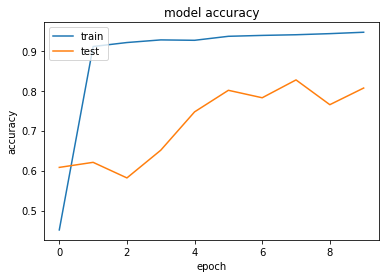

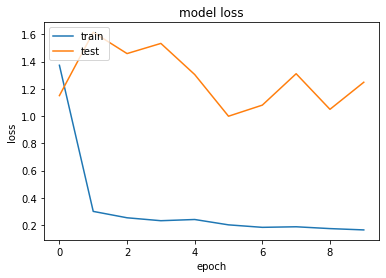

In [103]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()